## **Afame Technologies Internship Task 1 - Sales Data Analysis**

#### Goal: 

Use sales data analysis to find patterns, best-selling items, and revenue indicators to help make business decisions. This project will require you to take into a sizable sales dataset in order to get some insightful information. To successfully convey your findings, you will compute revenue measures like

total sales,
analyze sales trends over time,
determine the best-selling products, and build visualizations. This assignment demonstrates your capacity to work with and extract knowledge from huge datasets, empowering you to provide data-driven suggestions for improving sales tactics.

### **Exploratory Data Analysis**

In [9]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
# Import Dataset
df = pd.read_excel("sales_data.xlsx")

In [11]:
# Read dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [12]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [13]:
# Statistical Description of data
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


In [14]:
# Shape of dataset
df.shape

(51290, 24)

In [15]:
# Unique columns of dataset
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [16]:
# Checking for null values
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [17]:
# Checking for duplicated records
df.duplicated().sum()

0

In [18]:
# Drop "Postal Code" column
df = df.drop('Postal Code', axis=1)

In [19]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [20]:
# Create new columns "Year" and "Month" derived from "Order Date"
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Month'] = pd.DatetimeIndex(df['Order Date']).month

In [21]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11


In [22]:
df['Ship Mode'].unique()

array(['Same Day', 'Second Class', 'First Class', 'Standard Class'],
      dtype=object)

In [23]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [24]:
df['State'].unique()

array(['New York', 'New South Wales', 'Queensland', ..., 'Manicaland',
       'Kabarole', 'Matabeleland North'], dtype=object)

In [25]:
df['City'].unique()

array(['New York City', 'Wollongong', 'Brisbane', ..., 'Abilene',
       'Felahiye', 'Victoria Falls'], dtype=object)

In [26]:
len(df['State'].unique())

1094

In [27]:
len(df['City'].unique())

3636

In [28]:
df['Sub-Category'].unique()

array(['Accessories', 'Chairs', 'Phones', 'Copiers', 'Tables', 'Binders',
       'Supplies', 'Appliances', 'Machines', 'Bookcases', 'Storage',
       'Furnishings', 'Art', 'Paper', 'Envelopes', 'Fasteners', 'Labels'],
      dtype=object)

In [29]:
df['Product Name'].unique()

array(['Plantronics CS510 - Over-the-Head monaural Wireless Headset System',
       'Novimex Executive Leather Armchair, Black',
       'Nokia Smart Phone, with Caller ID', ...,
       'Kleencut Forged Office Shears by Acme United Corporation',
       'Holmes Visible Mist Ultrasonic Humidifier with 2.3-Gallon Output per Day, Replacement Filter',
       'Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac'],
      dtype=object)

In [30]:
df['Order Priority'].unique()

array(['Critical', 'Medium', 'High', 'Low'], dtype=object)

In [31]:
# Create a new column "Revenue" which is equal to "Sales x Quantity"
df['Revenue'] = df['Sales'].mul(df['Quantity'])

In [32]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month,Revenue
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7,16167.550
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,33384.555
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10,46576.539
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1,14462.550
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11,22663.680


### **Visualizations**

### Question1: Which top 10 customer IDs contributed the most to revenue?

C:\Users\acer\AppData\Local\Temp\ipykernel_10060\110617607.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  top10CustomerID = sns.barplot(df.groupby(['Customer ID'])['Revenue'].sum().iloc[:10].sort_values(ascending=False), palette="winter")


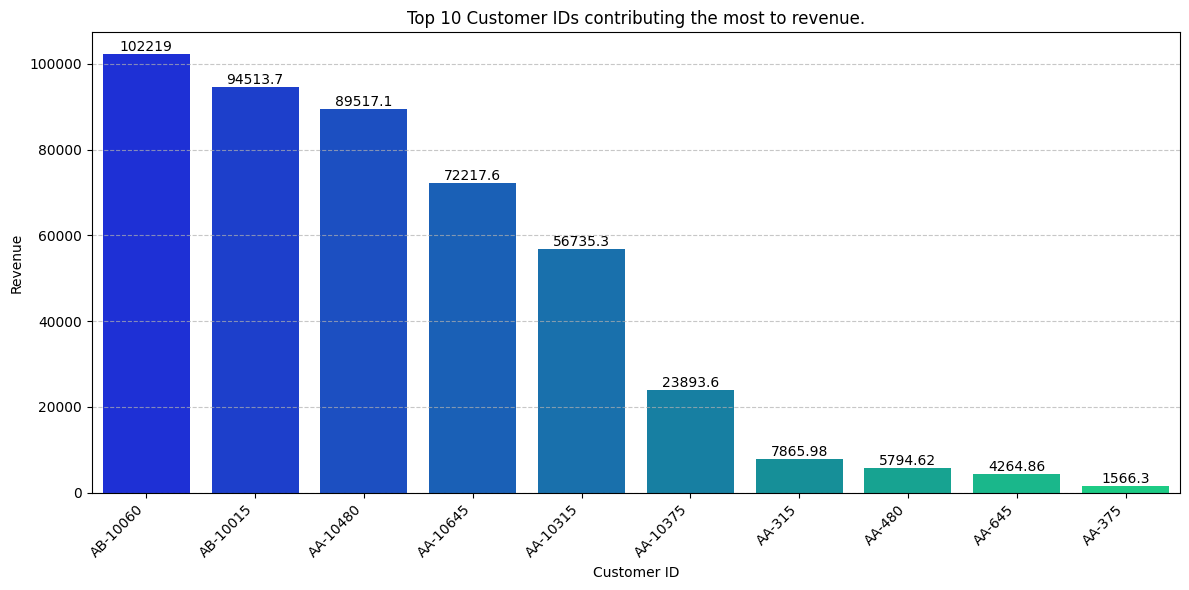

In [33]:
plt.figure(figsize=(12,6))
top10CustomerID = sns.barplot(df.groupby(['Customer ID'])['Revenue'].sum().iloc[:10].sort_values(ascending=False), palette="winter")
for bars in top10CustomerID.containers:
    top10CustomerID.bar_label(bars)
plt.title('Top 10 Customer IDs contributing the most to revenue.')
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

### Question 2: Which 10 customer IDs contributed the most to profit?

C:\Users\acer\AppData\Local\Temp\ipykernel_10060\3460404308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  top10CustomerIDProfit = sns.barplot(df.groupby(['Customer ID'])['Profit'].sum().iloc[:10].sort_values(ascending=False), palette="autumn")


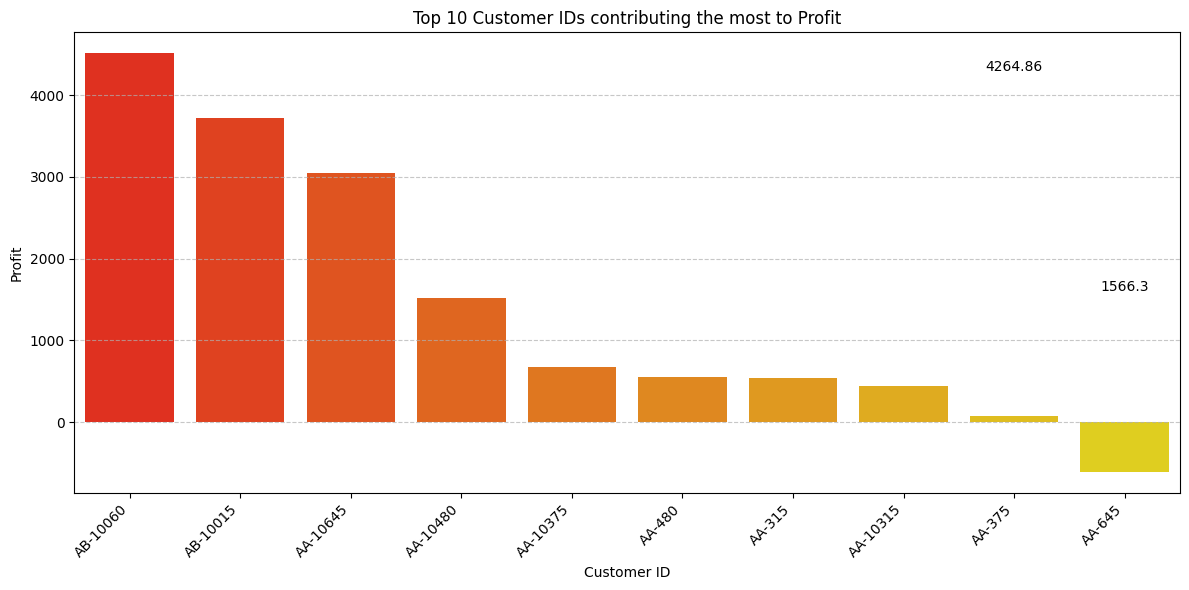

In [34]:
plt.figure(figsize=(12,6))
top10CustomerIDProfit = sns.barplot(df.groupby(['Customer ID'])['Profit'].sum().iloc[:10].sort_values(ascending=False), palette="autumn")
for bars in top10CustomerID.containers:
    top10CustomerIDProfit.bar_label(bars)
plt.title('Top 10 Customer IDs contributing the most to Profit')
plt.xlabel("Customer ID")
plt.ylabel("Profit")
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

### Question 3: Which Top 10 customers ID has placed the most orders?

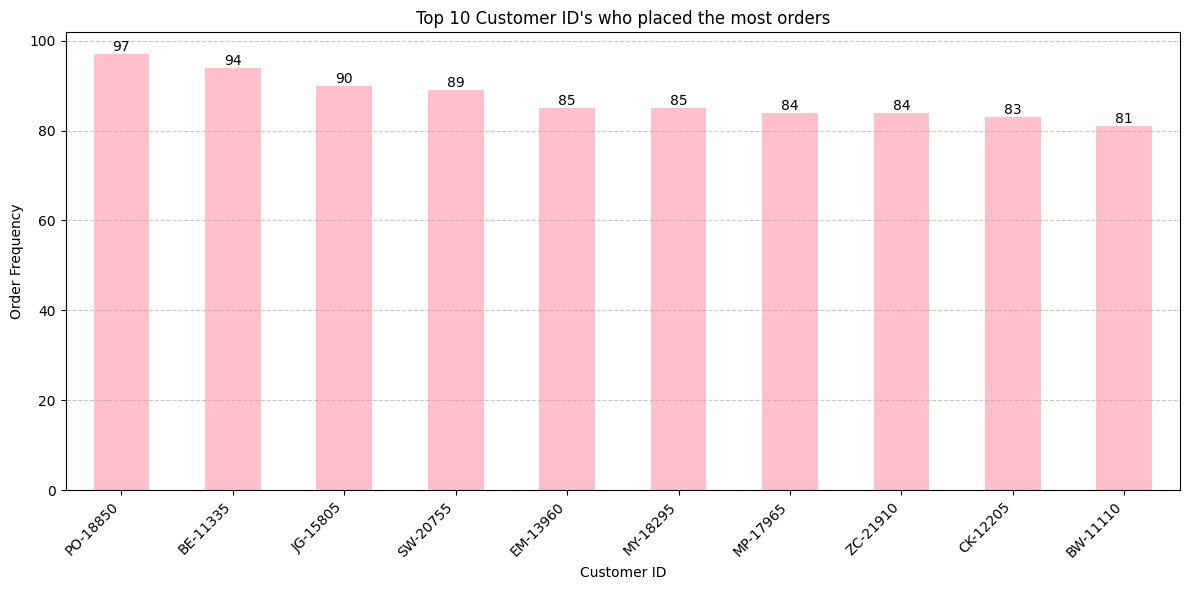

In [35]:
top10CustomerIDMostOrders = df['Customer ID'].value_counts().iloc[:10]
plt.figure(figsize=(12, 6)) 
ax = top10CustomerIDMostOrders.plot(kind='bar', color='pink')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Top 10 Customer ID's who placed the most orders")
plt.xlabel("Customer ID")
plt.ylabel("Order Frequency")
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

### Question4: Which top 10 customer Names contributed the most to revenue?

C:\Users\acer\AppData\Local\Temp\ipykernel_10060\973665718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  top10CustomerName = sns.barplot(df.groupby(['Customer Name'])['Revenue'].sum().iloc[:10].sort_values(ascending=False), palette="copper")


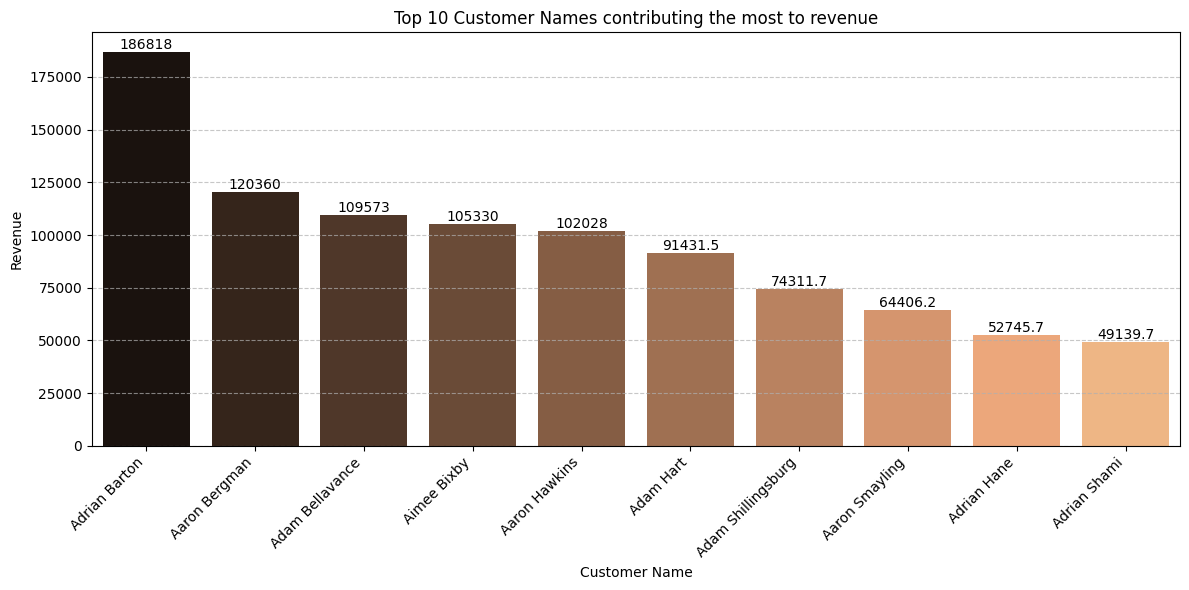

In [40]:
plt.figure(figsize=(12,6))
top10CustomerName = sns.barplot(df.groupby(['Customer Name'])['Revenue'].sum().iloc[:10].sort_values(ascending=False), palette="copper")
for bars in top10CustomerName.containers:
    top10CustomerName.bar_label(bars)
plt.title('Top 10 Customer Names contributing the most to revenue')
plt.xlabel("Customer Name")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

### Question 5: Which 10 customer Names contributed the most to profit?

C:\Users\acer\AppData\Local\Temp\ipykernel_10060\1908947028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  top10CustomerNameProfit = sns.barplot(df.groupby(['Customer Name'])['Profit'].sum().iloc[:10].sort_values(ascending=False), palette="hls")


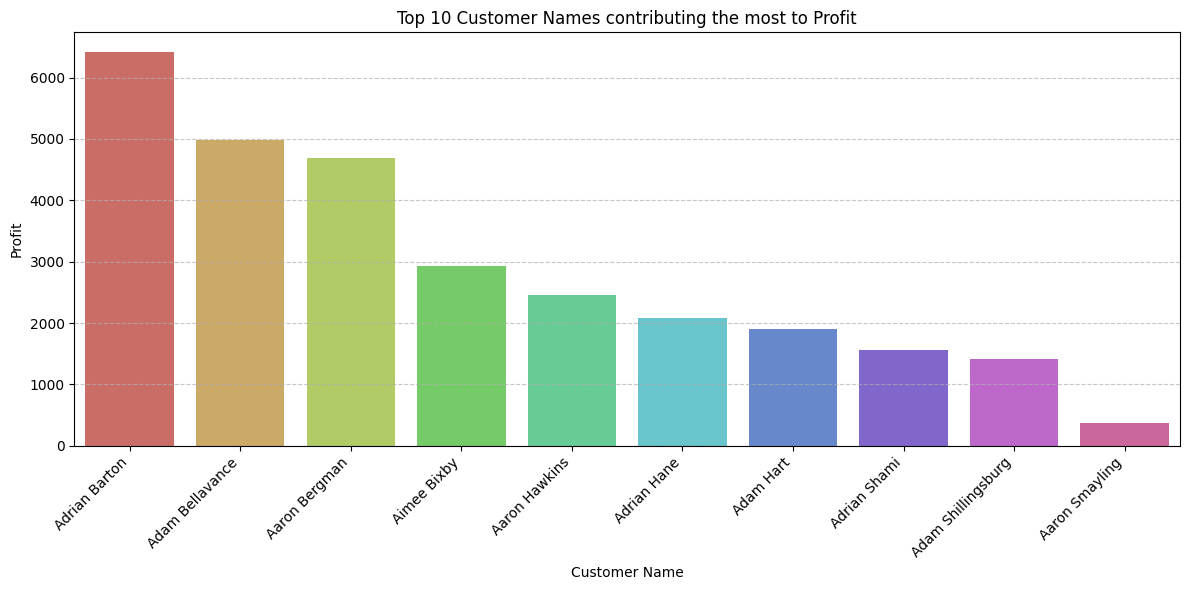

In [45]:
plt.figure(figsize=(12,6))
top10CustomerNameProfit = sns.barplot(df.groupby(['Customer Name'])['Profit'].sum().iloc[:10].sort_values(ascending=False), palette="hls")
for bars in top10CustomerName.containers:
    top10CustomerNameProfit.bar_label(bars)
plt.title('Top 10 Customer Names contributing the most to Profit')
plt.xlabel("Customer Name")
plt.ylabel("Profit")
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

### Question 6: Which Top 10 customers Names has placed the most orders?

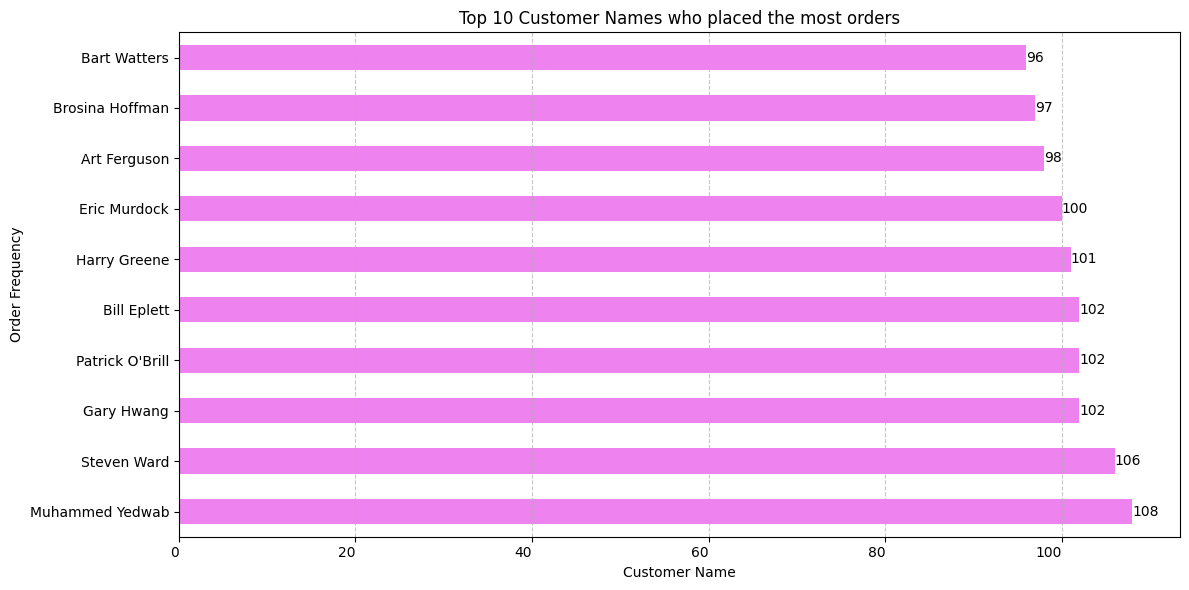

In [51]:
top10CustomerNamesMostOrders = df['Customer Name'].value_counts().iloc[:10]
plt.figure(figsize=(12, 6)) 
ax = top10CustomerNamesMostOrders.plot(kind='barh', color='violet')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Top 10 Customer Names who placed the most orders")
plt.xlabel("Customer Name")
plt.ylabel("Order Frequency")
plt.xticks(rotation=0, ha='right')  
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

In [52]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month,Revenue
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7,16167.550
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,33384.555
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10,46576.539
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1,14462.550
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11,22663.680


### Question 7: What is the profit contribution of each segment?

C:\Users\acer\AppData\Local\Temp\ipykernel_10060\408714787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  topSegmentProfit = sns.barplot(df.groupby(['Segment'])['Profit'].sum().iloc[:10].sort_values(ascending=False), palette="husl")


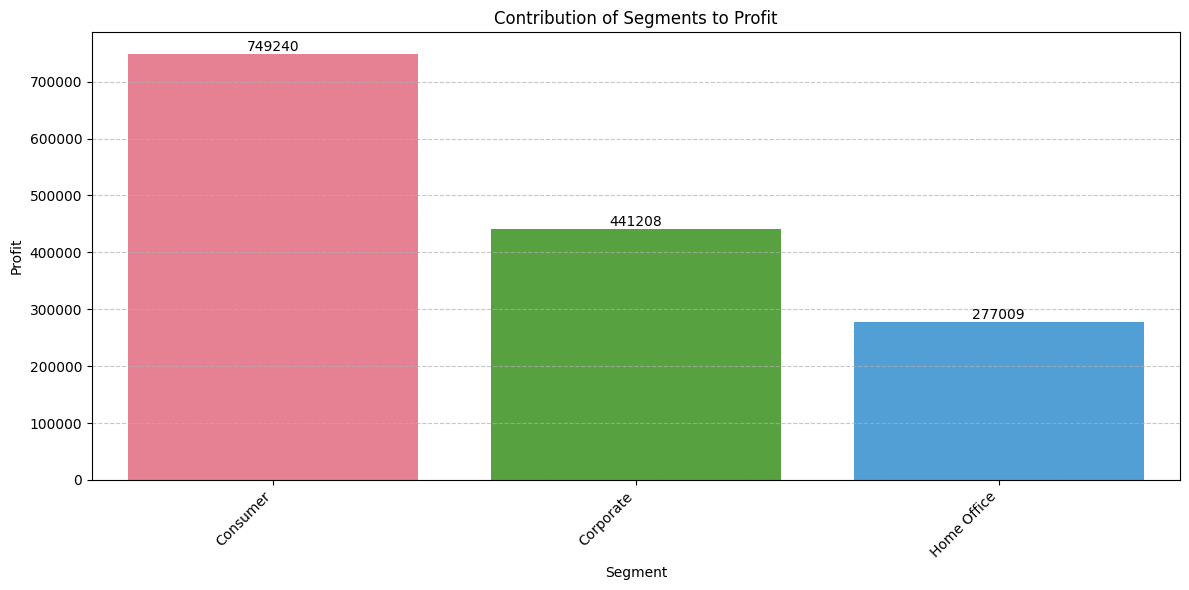

In [57]:
plt.figure(figsize=(12,6))
topSegmentProfit = sns.barplot(df.groupby(['Segment'])['Profit'].sum().iloc[:10].sort_values(ascending=False), palette="husl")
for bars in topSegmentProfit.containers:
    topSegmentProfit.bar_label(bars)
plt.title('Contribution of Segments to Profit')
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

### Question 8: Which segment contributed the most to the Revenue?

C:\Users\acer\AppData\Local\Temp\ipykernel_10060\929327367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  topSegmentRevenue = sns.barplot(df.groupby(['Segment'])['Revenue'].sum().iloc[:10].sort_values(ascending=False), palette="Set2")


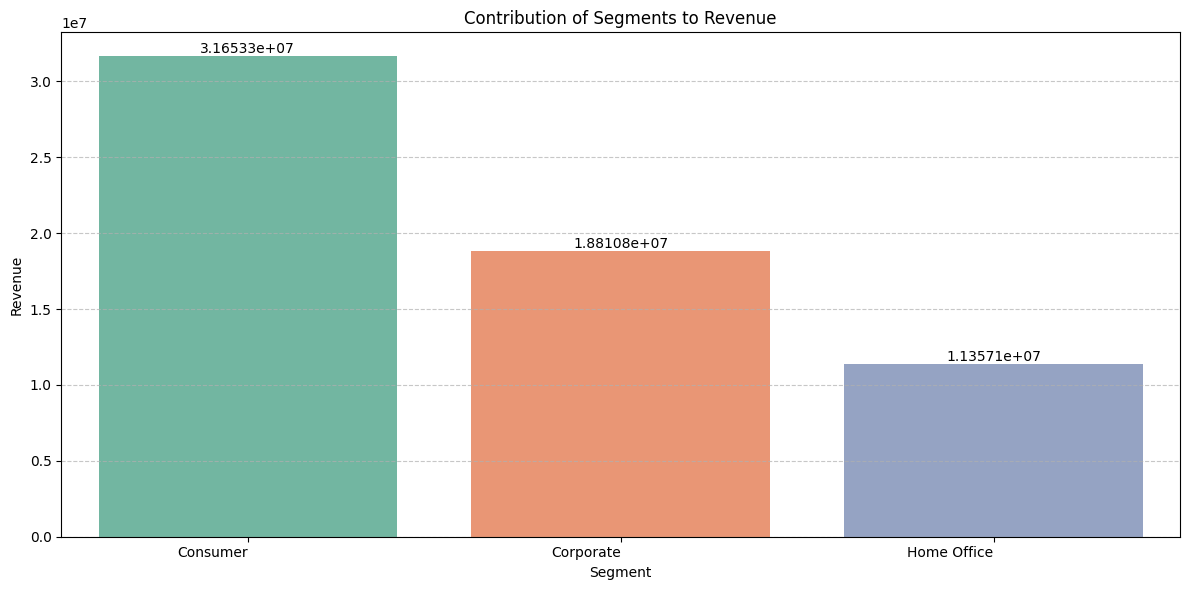

In [66]:
plt.figure(figsize=(12,6))
topSegmentRevenue = sns.barplot(df.groupby(['Segment'])['Revenue'].sum().iloc[:10].sort_values(ascending=False), palette="Set2")
for bars in topSegmentRevenue.containers:
    topSegmentRevenue.bar_label(bars)
plt.title('Contribution of Segments to Revenue')
plt.xlabel("Segment")
plt.ylabel("Revenue")
plt.xticks(rotation=0, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

### Question 9: Which segment placed the most orders?

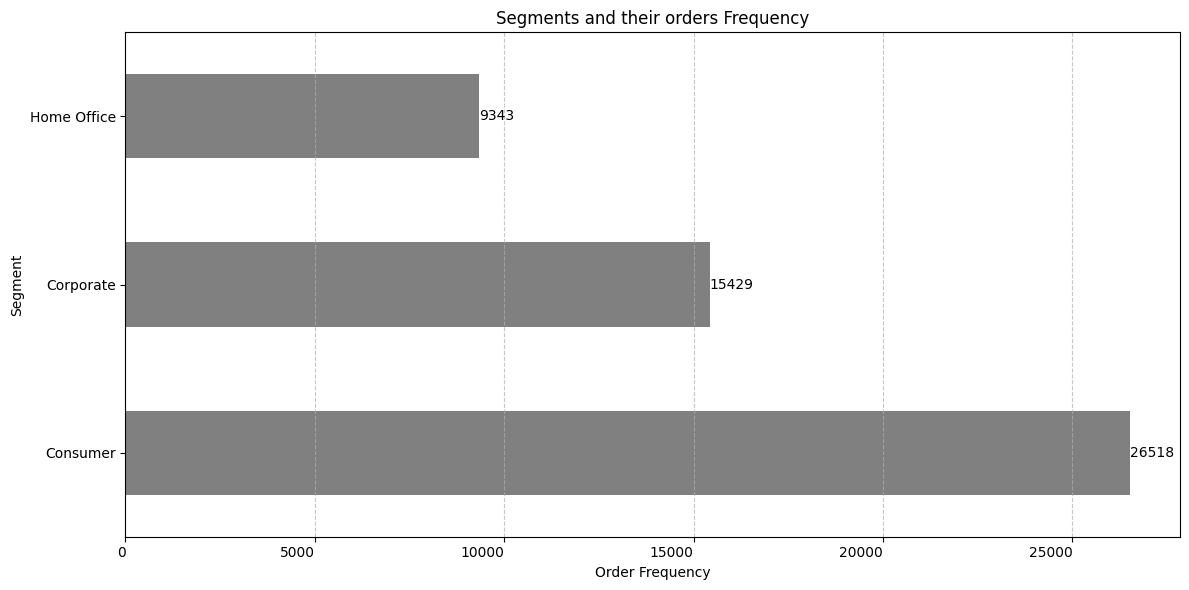

In [63]:
SegmentMostOrders = df['Segment'].value_counts().iloc[:10]
plt.figure(figsize=(12, 6)) 
ax = SegmentMostOrders.plot(kind='barh', color='gray')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Segments and their orders Frequency")
plt.xlabel("Order Frequency")
plt.ylabel("Segment")
plt.xticks(rotation=0, ha='right')  
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

### Question 10: Which product category generated the highest revenue?

C:\Users\acer\AppData\Local\Temp\ipykernel_10060\4073653175.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Sales', y='Category', data=category_revenue, palette='viridis')


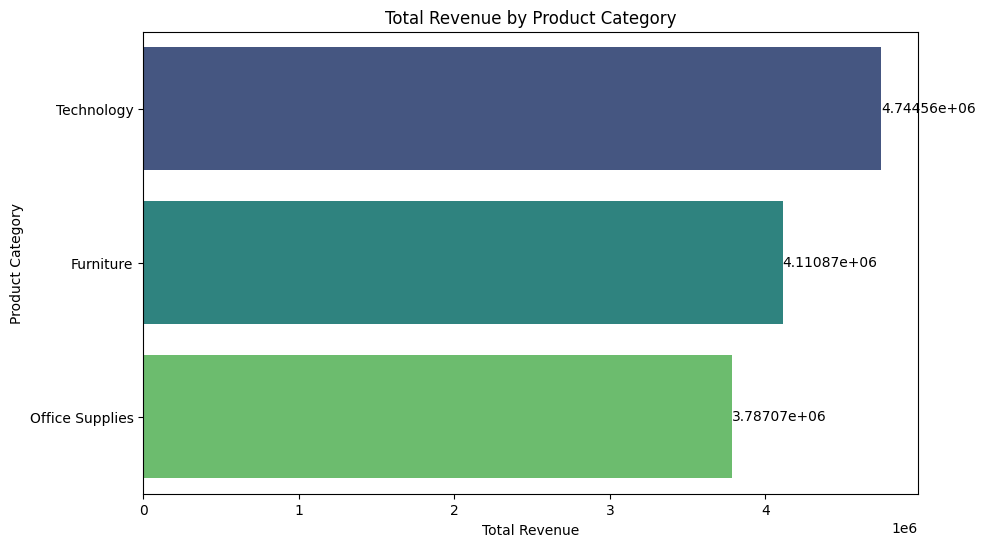

In [70]:
category_revenue = df.groupby('Category')['Sales'].sum().reset_index()
category_revenue = category_revenue.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Sales', y='Category', data=category_revenue, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Total Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()

### Question 10: Which sub-category had the highest number of sales?

C:\Users\acer\AppData\Local\Temp\ipykernel_10060\3306644995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Sales', y='Sub-Category', data=subcategory_sales, palette='cubehelix')


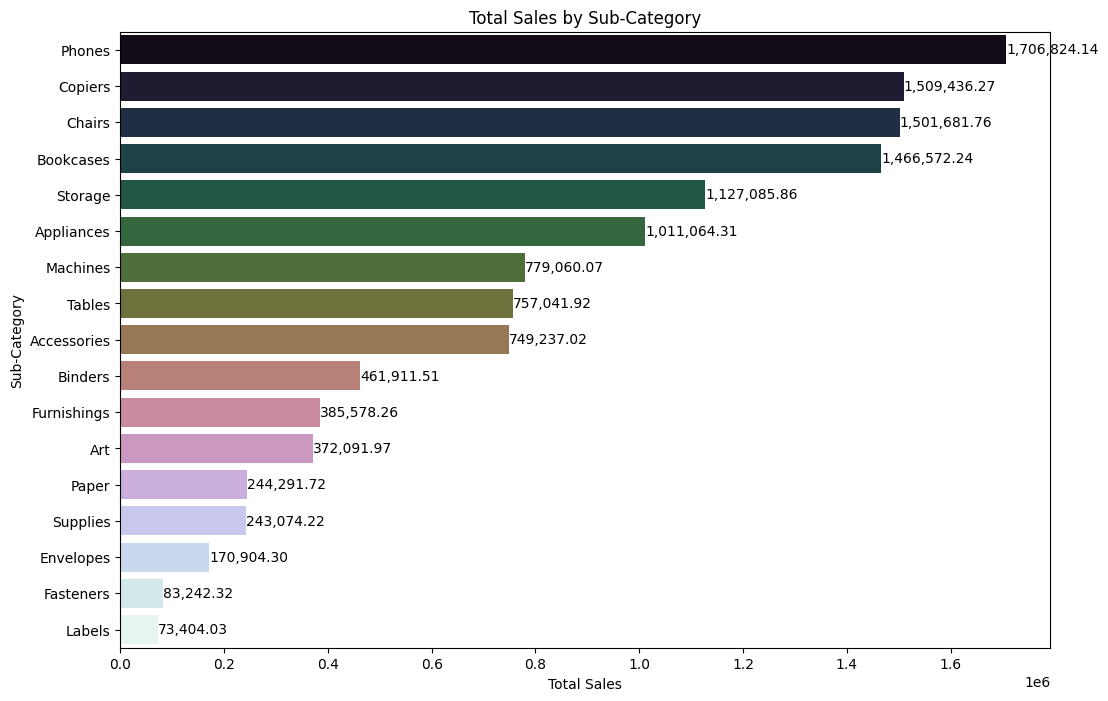

In [73]:
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()
subcategory_sales = subcategory_sales.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Sales', y='Sub-Category', data=subcategory_sales, palette='cubehelix')
for index, value in enumerate(subcategory_sales['Sales']):
    plt.text(value, index, f'{value:,.2f}', va='center')

plt.title('Total Sales by Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.show()

### Question 11: Which product Name contributed the most to profit?

C:\Users\acer\AppData\Local\Temp\ipykernel_10060\454147263.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Profit', y='Product Name', data=productname_profit, palette='viridis')


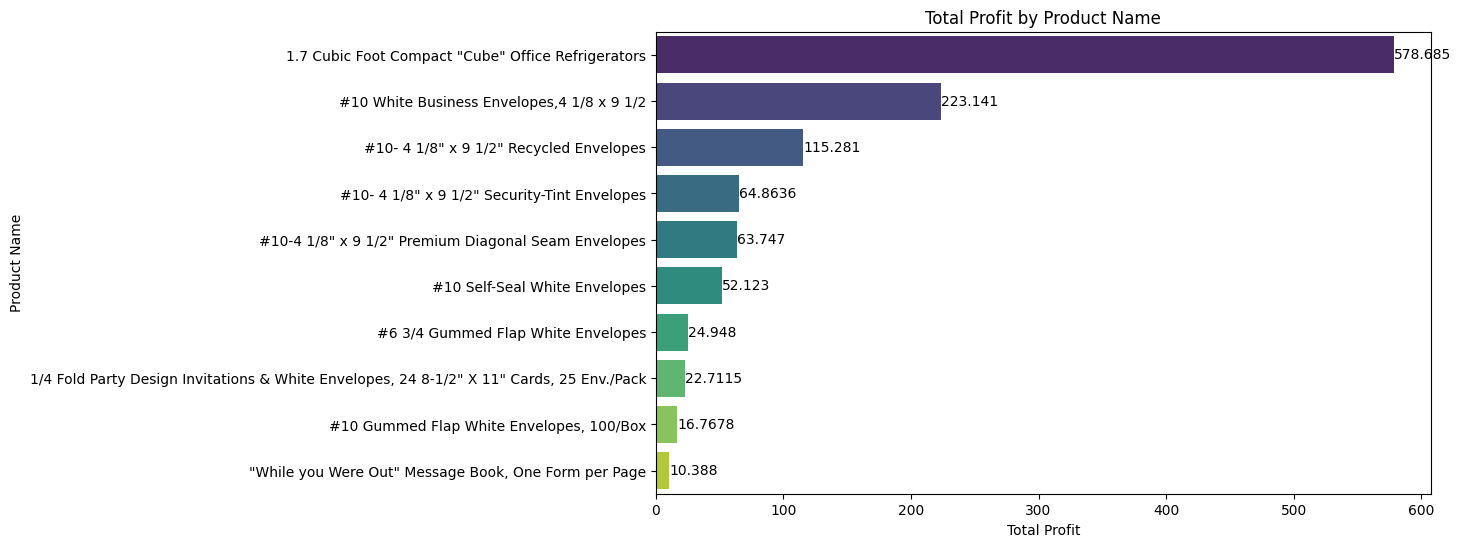

In [84]:
productname_profit = df.groupby('Product Name')['Profit'].sum().reset_index().iloc[:10]
productname_profit = productname_profit.sort_values(by='Profit', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Profit', y='Product Name', data=productname_profit, palette='viridis')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Total Profit by Product Name')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

### Question 12: What is the total sales and profit by ship mode?

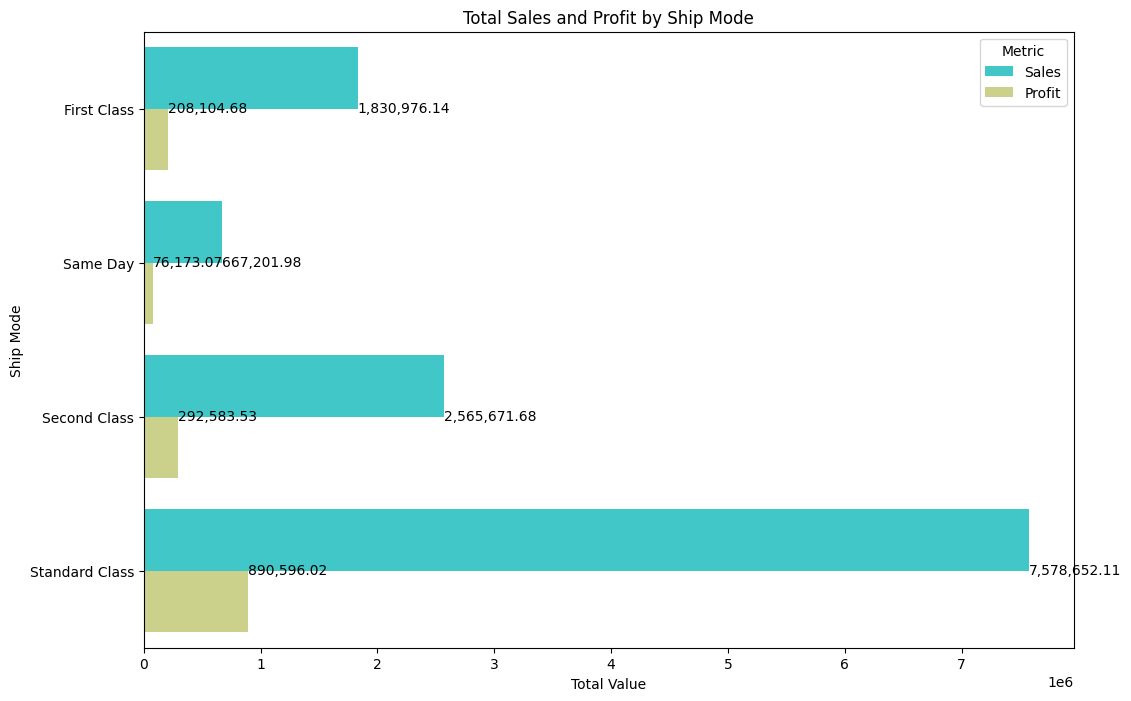

In [89]:
ship_mode_summary = df.groupby('Ship Mode')[['Sales', 'Profit']].sum().reset_index()

ship_mode_summary_melted = ship_mode_summary.melt(id_vars='Ship Mode', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Value', y='Ship Mode', hue='Metric', data=ship_mode_summary_melted, palette='rainbow')

for index, row in ship_mode_summary_melted.iterrows():
    plt.text(row['Value'], index % 4, f'{row["Value"]:,.2f}', va='center')

plt.title('Total Sales and Profit by Ship Mode')
plt.xlabel('Total Value')
plt.ylabel('Ship Mode')
plt.legend(title='Metric')
plt.show()

### Question 13: Which city contributed the most to overall sales?

C:\Users\acer\AppData\Local\Temp\ipykernel_10060\2400854758.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Sales', y='City', data=city_sales.head(10), palette='crest')


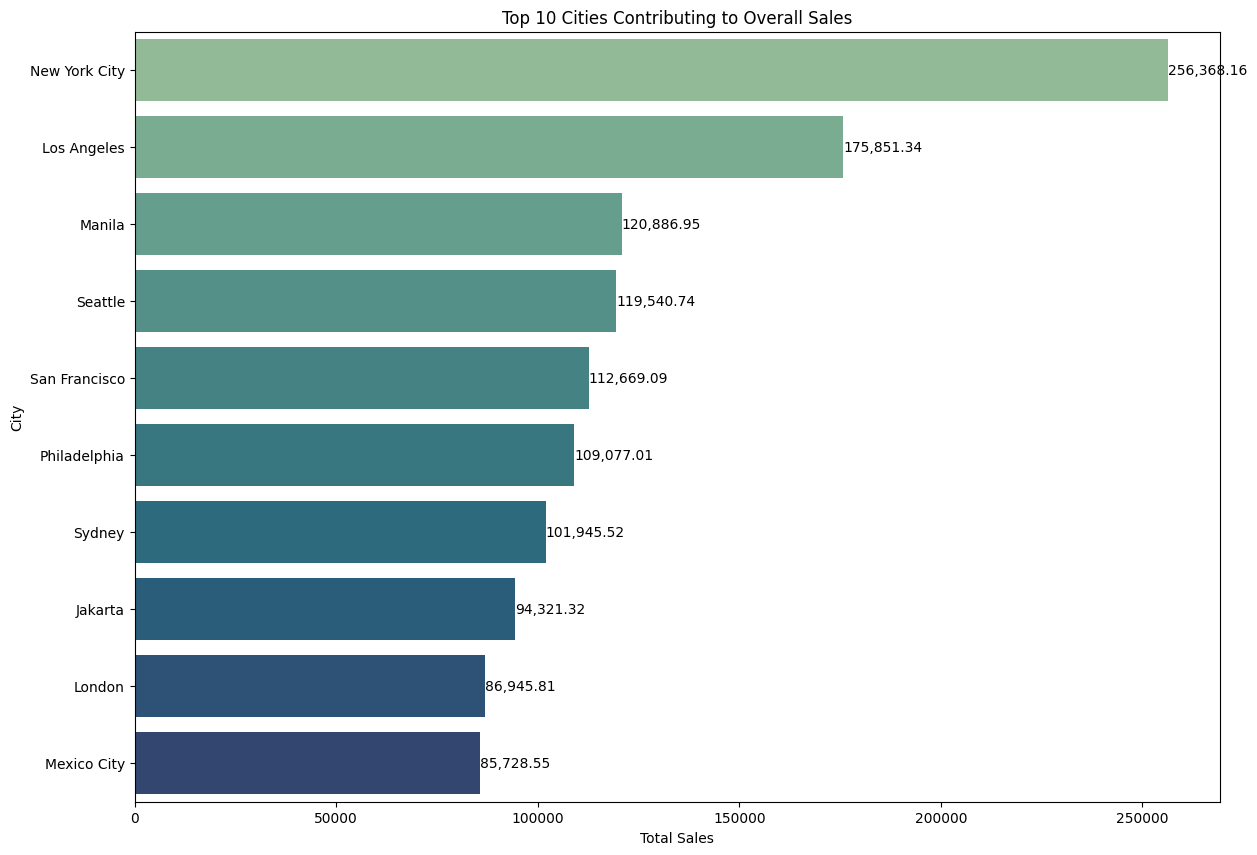

In [91]:
city_sales = df.groupby('City')['Sales'].sum().reset_index()

city_sales = city_sales.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='Sales', y='City', data=city_sales.head(10), palette='crest')

for index, value in enumerate(city_sales['Sales'].head(10)):
    plt.text(value, index, f'{value:,.2f}', va='center')

plt.title('Top 10 Cities Contributing to Overall Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

### Question 14: Which segment contributes the most to profit, and how is the total profit distributed among different segments?

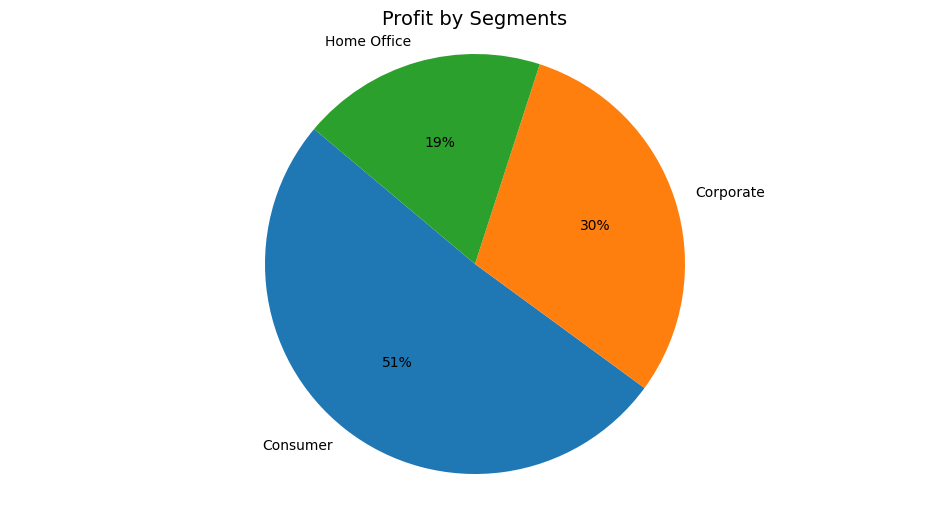

In [92]:
# Which Segment contributing in highest profit
highestProfitSegment = df.groupby(['Segment'])['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.pie(highestProfitSegment, labels=highestProfitSegment.index, autopct='%.0f%%', startangle=140)
plt.title("Profit by Segments", fontsize=14)
plt.axis('equal')  
plt.show()

### Question 15: Which year had the highest total profit, and what was the total profit amount for that year?

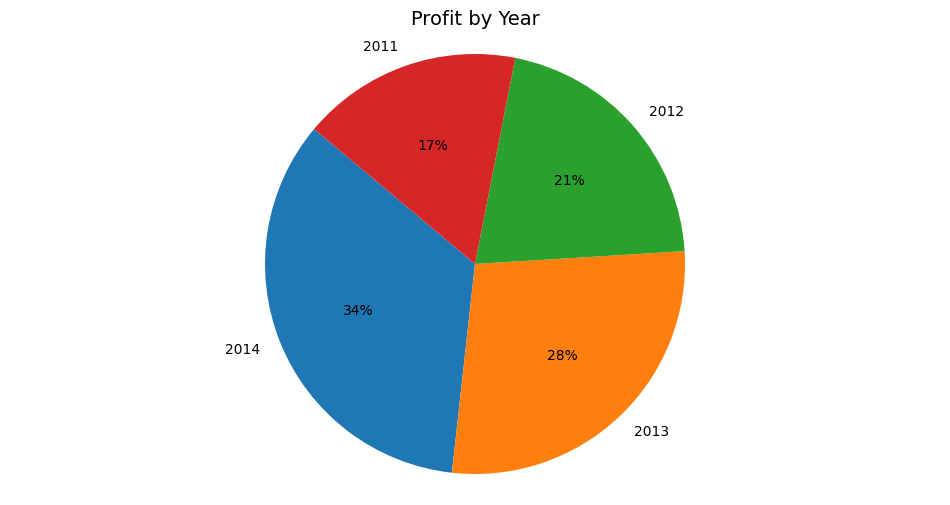

In [93]:
highestProfitbyYear = df.groupby(['Year'])['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.pie(highestProfitbyYear, labels=highestProfitbyYear.index, autopct='%.0f%%', startangle=140)
plt.title("Profit by Year", fontsize=14)
plt.axis('equal')  
plt.show()

### Question 16: What is the sales distribution across different product categories?

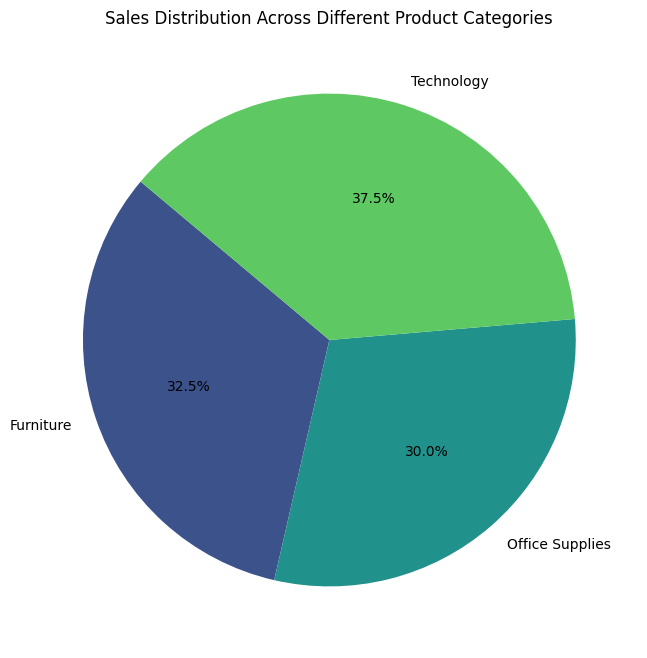

In [94]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 8))
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(category_sales)))
plt.title('Sales Distribution Across Different Product Categories')
plt.show()

### Question 17: Which product had the highest return on investment (ROI)?

Product with the highest ROI:
Product Name    Tenex Trays, Wire Frame
Sales                            319.68
Profit                           159.84
ROI                                 0.5
Name: 10342, dtype: object


C:\Users\acer\AppData\Local\Temp\ipykernel_10060\2113465291.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='ROI', y='Product Name', data=top_roi_products, palette='mako')


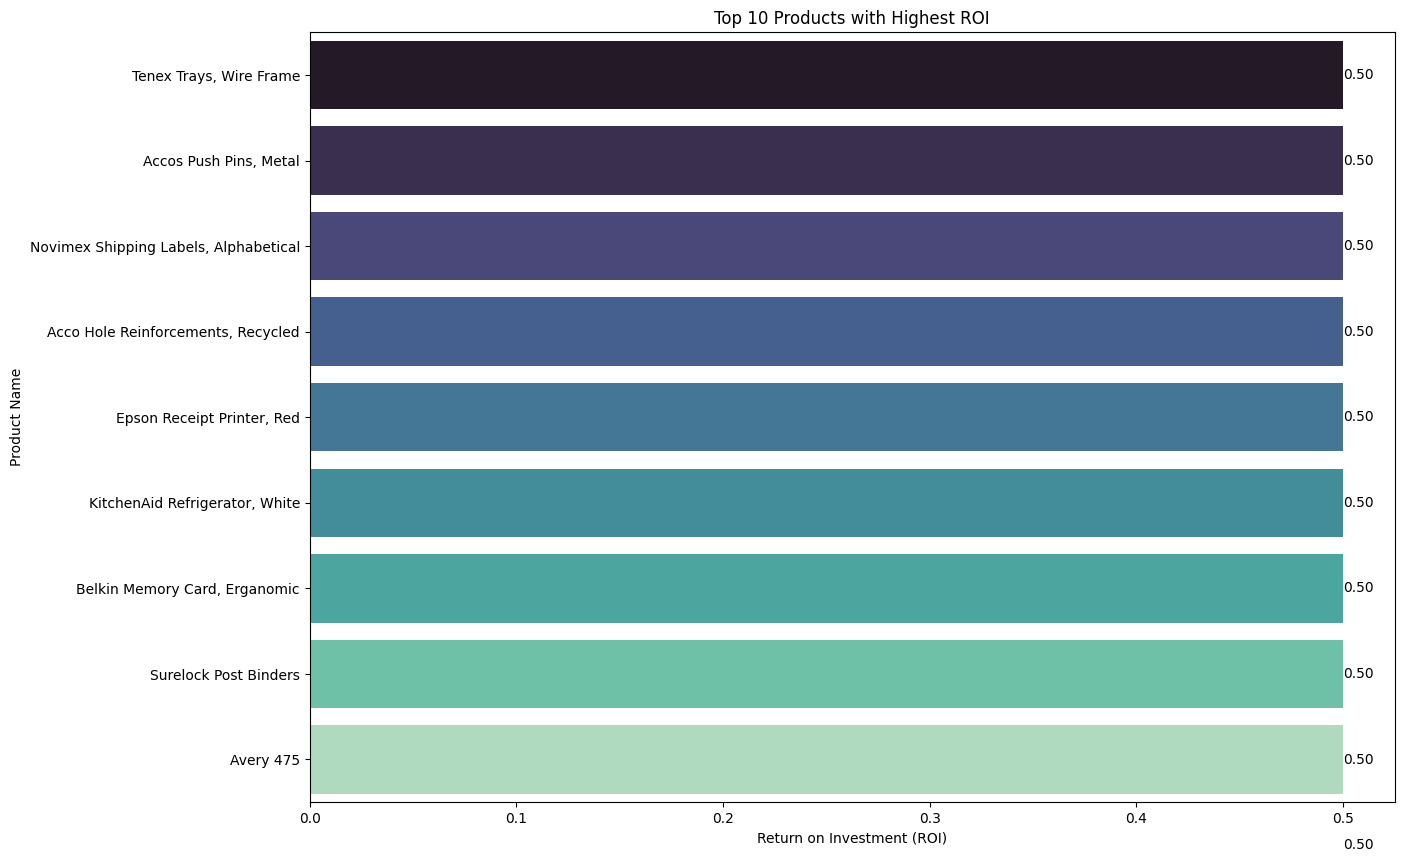

In [96]:
df['ROI'] = df['Profit'] / df['Sales']

max_roi_product = df.loc[df['ROI'].idxmax()]

product_info = max_roi_product[['Product Name', 'Sales', 'Profit', 'ROI']]

print("Product with the highest ROI:")
print(product_info)

top_roi_products = df.nlargest(10, 'ROI')[['Product Name', 'Sales', 'Profit', 'ROI']]

plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='ROI', y='Product Name', data=top_roi_products, palette='mako')

for index, value in enumerate(top_roi_products['ROI']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title('Top 10 Products with Highest ROI')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Product Name')
plt.show()

### Question 18: How do sales and profit compare across different sub-categories?

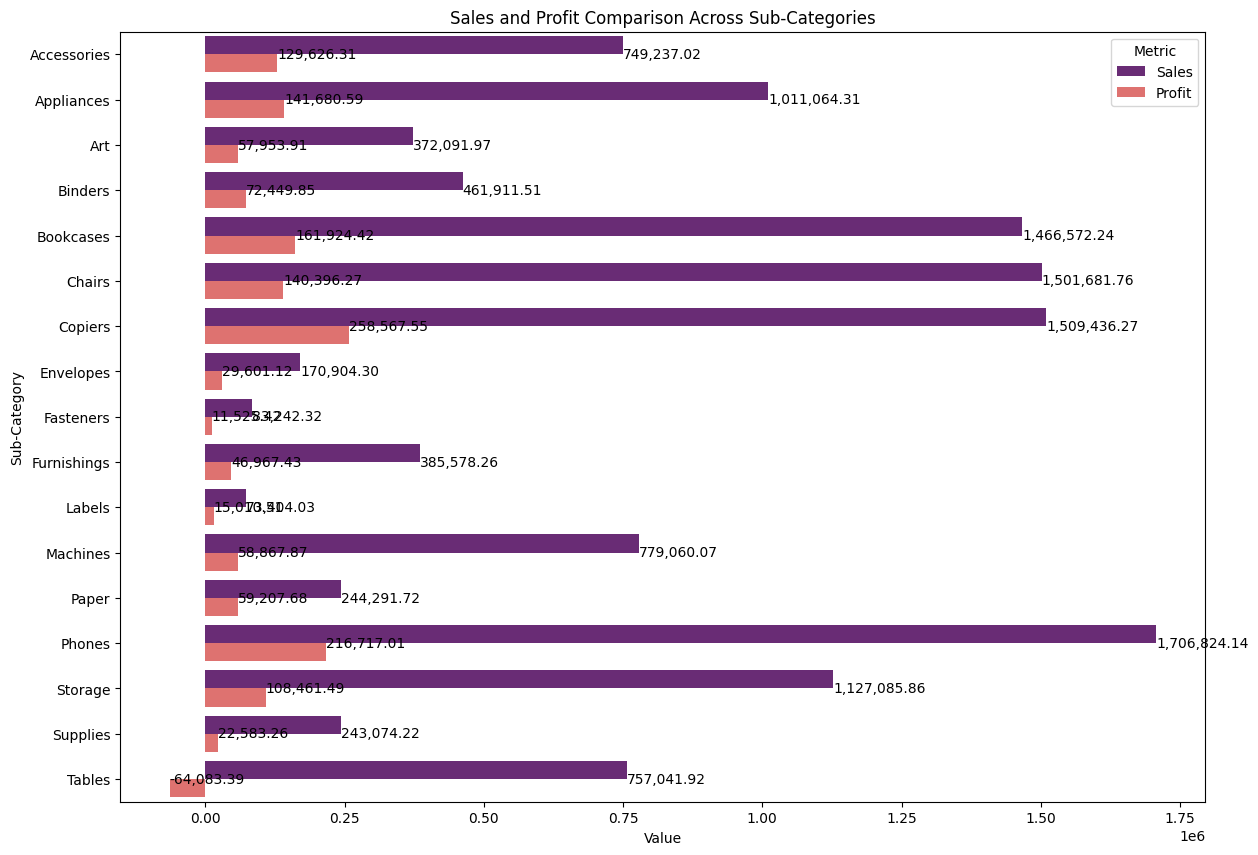

In [98]:
subcategory_summary = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()

subcategory_summary_melted = subcategory_summary.melt(id_vars='Sub-Category', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='Value', y='Sub-Category', hue='Metric', data=subcategory_summary_melted, palette='magma')

for index, row in subcategory_summary_melted.iterrows():
    plt.text(row['Value'], index % len(subcategory_summary), f'{row["Value"]:,.2f}', va='center')

plt.title('Sales and Profit Comparison Across Sub-Categories')
plt.xlabel('Value')
plt.ylabel('Sub-Category')
plt.legend(title='Metric')
plt.show()